
# **Credit Card Fraud Detection USING SVM Model with PYTHON**

In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn

In [ ]:
# Import libraries and read file from drive
import pandas as pd
import numpy as np
import pyarrow as pa
import json

# # Mount from google drive
# from google.colab import drive
# drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/content/drive/')

# Read csv file by passing path
mcd_df = pd.read_csv('/content/drive/MyDrive/Files/credit_card_fraud.csv')
mcd_df

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,01-01-2019 00:00,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,01-01-2019 00:00,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,01-01-2019 00:07,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,21-12-1945,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,01-01-2019 00:09,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,30-08-1967,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,01-01-2019 00:21,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",02-08-1967,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,31-12-2020 23:57,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",09-11-1939,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,31-12-2020 23:58,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,20-09-1958,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,31-12-2020 23:59,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,13-02-1966,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,31-12-2020 23:59,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,29-11-1981,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0


In [ ]:
import numpy as np
mcd_df['amt'] =pd.to_numeric(mcd_df['amt'])
mcd_df['category'] =  pd.factorize(mcd_df['category'], sort=True)[0]+1
mcd_df['merchant'] =  pd.factorize(mcd_df['merchant'], sort=True)[0]+1
mcd_df['trans_date_trans_time'] =  pd.factorize(mcd_df['trans_date_trans_time'], sort=True)[0]+1
mcd_df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,1,242,5,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,1,391,1,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2,309,5,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,21-12-1945,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,3,43,13,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,30-08-1967,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,4,83,10,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",02-08-1967,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,282039,559,7,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",09-11-1939,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,282040,483,8,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,20-09-1958,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,282041,508,6,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,13-02-1966,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,282041,497,8,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,29-11-1981,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0


In [ ]:
mcd_df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,01/01/2019 00:00,"Heller, Gutmann and Zieme",5,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,01/01/2019 00:00,Lind-Buckridge,1,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,01/01/2019 00:07,Kiehn Inc,5,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,21/12/1945,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,01/01/2019 00:09,Beier-Hyatt,13,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,30/08/1967,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,01/01/2019 00:21,Bruen-Yost,10,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",02/08/1967,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [ ]:
mcd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  int64  
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

Confusion Matrix:
 [[3744 2195]
 [  22   39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.63      0.77      5939
           1       0.02      0.64      0.03        61

    accuracy                           0.63      6000
   macro avg       0.51      0.63      0.40      6000
weighted avg       0.98      0.63      0.76      6000



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


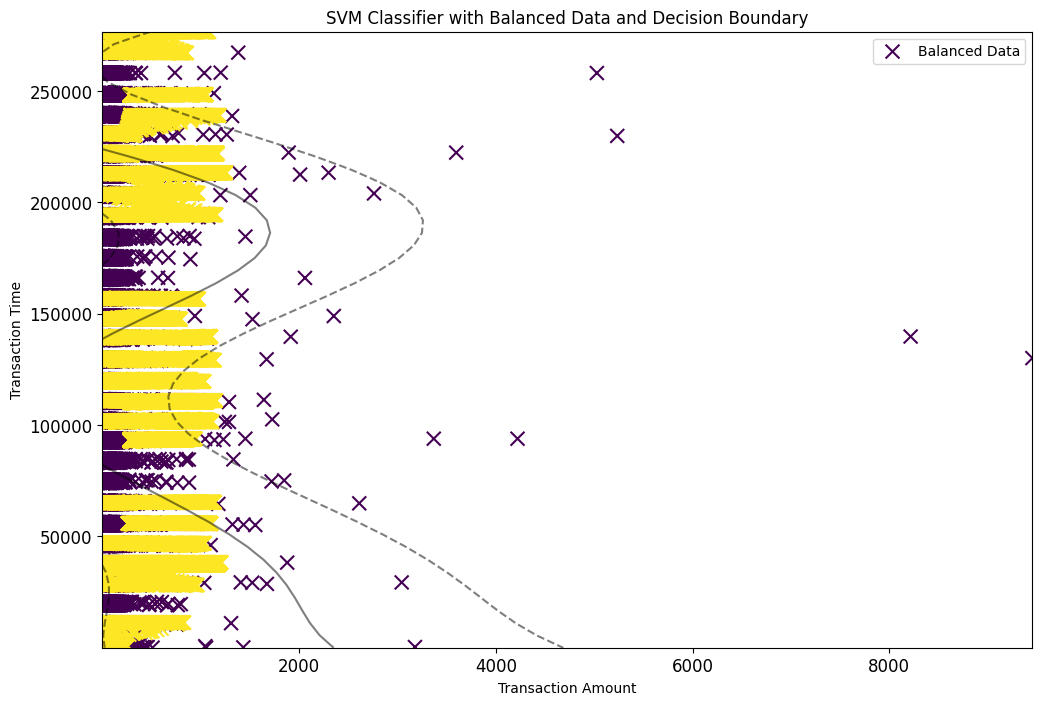

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

# Assuming 'dataset' is your DataFrame
new_df = mcd_df.head(30000)

X = new_df[['amt', 'trans_date_trans_time']]
y = new_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Calculate class weights for SVC
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)

# Create SVM classifier with class weights
clf = SVC(class_weight={0: class_weights[0], 1: class_weights[1]})
clf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot decision boundary
plt.figure(figsize=(12, 8))

# Plot the resampled (balanced) data points
plt.scatter(X_resampled['amt'], X_resampled['trans_date_trans_time'],  c=y_resampled, cmap='viridis', marker='x', s=100, label='Balanced Data')

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(X_resampled['amt'].min(), X_resampled['amt'].max(), 50),
                     np.linspace(X_resampled['trans_date_trans_time'].min(), X_resampled['trans_date_trans_time'].max(), 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Set x and y labels
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Time')

# Adjust axis font size
plt.tick_params(axis='both', labelsize=12)

plt.title('SVM Classifier with Balanced Data and Decision Boundary')
plt.legend()
plt.show()


# Before SMOTE

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9898333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5939
           1       0.00      0.00      0.00        61

    accuracy                           0.99      6000
   macro avg       0.49      0.50      0.50      6000
weighted avg       0.98      0.99      0.98      6000



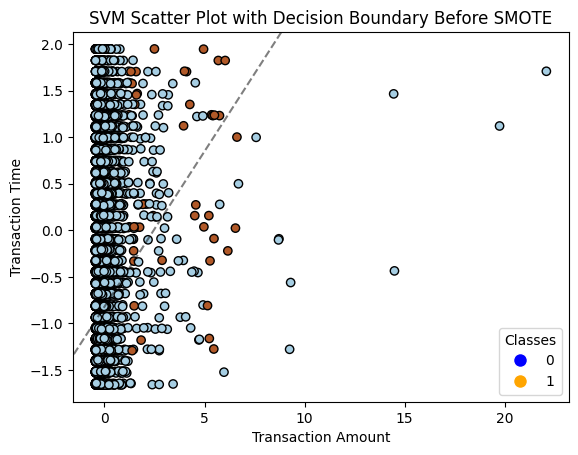

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from matplotlib.lines import Line2D

# Assuming your DataFrame is named df
# X contains features (amt and category), y is the target variable (is_fraud)
X = new_df[['amt', 'trans_date_trans_time']]
y = new_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Plot the data points with different colors based on their true classes
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k')

# Plot the decision boundary (hyperplane)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Set labels and title
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Time')
plt.title('SVM Scatter Plot with Decision Boundary Before SMOTE')

# Create legend handles for '0' and '1'
legend_elements = [Line2D([0], [0], marker='o', color='w', label='0', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='1', markerfacecolor='orange', markersize=10)]

# Add a legend using the custom legend elements
plt.legend(handles=legend_elements, title='Classes')

# Show the plot
plt.show()


# Confusion Matrix

Accuracy: 0.9898


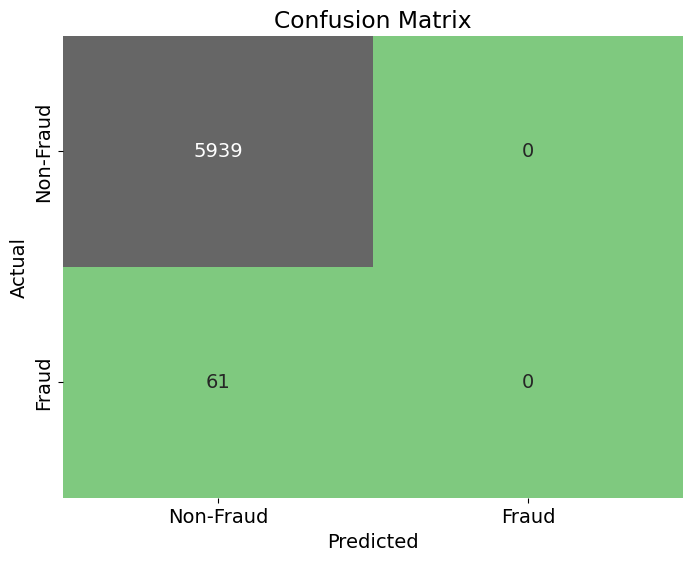

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix using seaborn heatmap
plt.rcParams.update({'font.size': 14})  # Set font size
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Accent", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# After SMOTE

Accuracy: 0.8436342202761873
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      5894
           1       0.93      0.75      0.83      5982

    accuracy                           0.84     11876
   macro avg       0.86      0.84      0.84     11876
weighted avg       0.86      0.84      0.84     11876



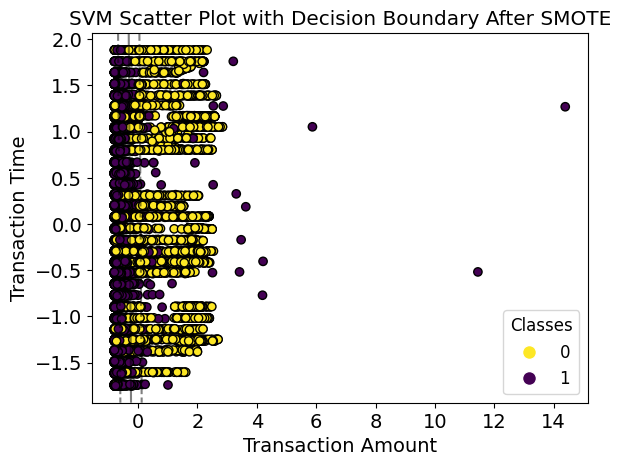

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from matplotlib.lines import Line2D
from imblearn.over_sampling import SMOTE

# Assuming your DataFrame is named df
# X contains features (amt and category), y is the target variable (is_fraud)
X = new_df[['amt', 'trans_date_trans_time']]
y = new_df['is_fraud']

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


# Plot the data points
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k')

# Get the colors from the scatter plot
legend_colors = scatter.to_rgba(scatter.get_array())

# Plot the decision boundary (hyperplane)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.rcParams.update({'font.size': 12})
# Set labels and title
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Time')
plt.title('SVM Scatter Plot with Decision Boundary After SMOTE')

# Manually specify legend colors
legend_elements = [Line2D([0], [0], marker='o', color='w', label='0', markerfacecolor=legend_colors[0], markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='1', markerfacecolor=legend_colors[1], markersize=10)]

# Add a legend using the custom legend elements
plt.legend(handles=legend_elements, title='Classes')

# Show the plot
plt.show()


# Confusion Matrix After SMOTE

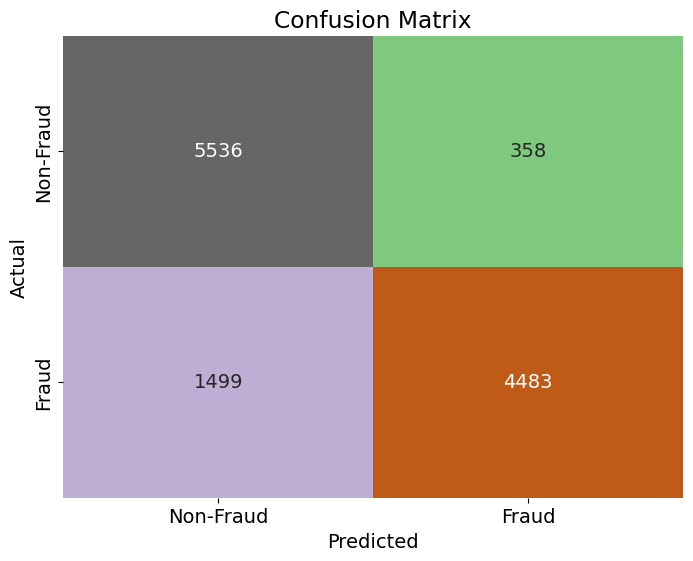

In [ ]:
### Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix using seaborn heatmap
plt.rcParams.update({'font.size': 14})  # Set font size
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Accent", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ROC Curve After SMOTE

ROC AUC: 0.8443375880384054


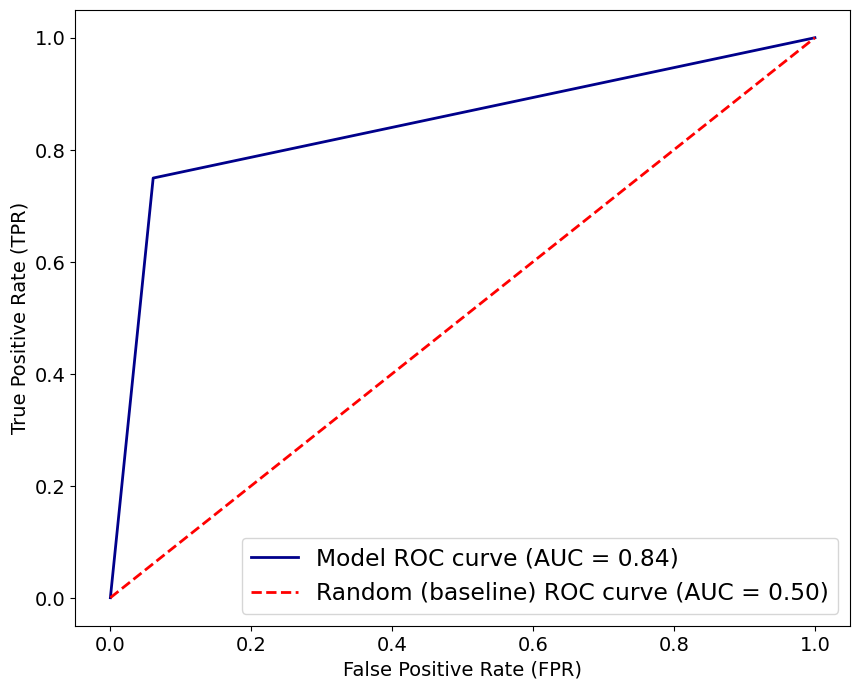

In [ ]:
#######################
####ROC Curve
##########################################
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')


# Output accuracy and ROC AUC to Power BI
accuracy_df = pd.DataFrame({'Metric': ['Accuracy'], 'Value': [accuracy]})
roc_auc_df = pd.DataFrame({'Metric': ['ROC AUC'], 'Value': [roc_auc]})
output_df = pd.concat([accuracy_df, roc_auc_df])

# Random (baseline) ROC curve
random_fpr, random_tpr, _ = roc_curve(y_test, [0.5] * len(y_test))
random_roc_auc = auc(random_fpr, random_tpr)

# Customize Matplotlib settings
plt.rcParams.update({'font.size': 14})  # Set font size

# Plot ROC curve with legend
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkblue', lw=lw, label=f'Model ROC curve (AUC = {roc_auc:.2f})')
plt.plot(random_fpr, random_tpr, color='red', lw=lw, linestyle='--', label=f'Random (baseline) ROC curve (AUC = {random_roc_auc:.2f})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.legend(loc='lower right', fontsize='large')  # Customize legend font size
plt.show()
######################

**Extra code**
